In [224]:
#imports
import pennylane as qml
from pennylane import numpy as np
import networkx as nx
import csv

In [225]:
n_nodes = 9

# graphs for training
#graph_0 = [(0, 7), (1, 5), (1, 6), (1, 7), (2, 4), (2, 6), (2, 7), (3, 4), (3, 5), (3, 6), (4, 7), (5, 6), (5, 7), (6, 7), (6, 8), (7, 8)]
#graph_1 = [(0, 6), (7, 5), (7, 4), (7, 6), (2, 1), (2, 4), (2, 6), (3, 1), (3, 5), (3, 4), (1, 6), (5, 4), (5, 6), (4, 6), (4, 8), (6, 8)]
#graph_type  = 'Random'
## grid graph
#graph_0 = [(0, 1), (0, 3), (1, 2), (1, 4), (2, 5), (3, 4), (3, 6), (4, 5), (4, 7), (5, 8), (6, 7), (7, 8)]
#graph_1 = [(0, 2), (0, 7), (1, 5), (1, 6), (1, 8), (2, 5), (2, 8), (3, 4), (3, 7), (4, 6), (4, 8), (7, 8)]
#graph_type = 'Grid'
## cycle graph
#graph_0 = [(0, 1), (0, 8), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8)]
#graph_1 = [(0, 4), (0, 5), (1, 7), (1, 8), (2, 4), (2, 6), (3, 5), (3, 8), (6, 7)]
#graph_type = 'Cycle'
## barbell graph
#graph_0 = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3), (3, 4), (5, 6), (5, 7), (5, 8), (5, 4), (6, 7), (6, 8), (7, 8)]
#graph_1 = [(5, 1), (5, 2), (5, 3), (1, 2), (1, 3), (2, 3), (3, 4), (6, 0), (6, 7), (6, 8), (6, 4), (0, 7), (0, 8), (7, 8)]
#graph_type = 'Barbell'
#complete graph
#graph_0 = [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (4, 5), (4, 6), (4, 7), (4, 8), (5, 6), (5, 7), (5, 8), (6, 7), (6, 8), (7, 8)]
#graph_1 = [(1, 8), (2, 3), (2, 4), (0, 1), (0, 4), (0, 7), (1, 5), (1, 6), (1, 7), (2, 5), (0, 8), (1, 2), (1, 3), (1, 4), (2, 6), (2, 7), (2, 8), (3, 4), (0, 5), (0, 6), (3, 5), (3, 6), (3, 7), (6, 7), (6, 8), (7, 8), (3, 8), (5, 6), (5, 7), (4, 5), (4, 6), (4, 7), (4, 8), (5, 8), (0, 2), (0, 3)]
#graph_type = 'Complete'
#star graph
graph_0 = [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8)]
graph_1 = [(3, 1), (3, 2), (0, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8)]
graph_type = 'Star'
#turan_graph(8,2)
#graph_0 = [(0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8)]
#graph_1 = [(5, 4), (5, 8), (5, 6), (5, 7), (5, 0), (1, 4), (1, 8), (1, 6), (1, 7), (1, 0), (2, 4), (2, 8), (2, 6), (2, 7), (2, 0), (3, 4), (3, 8), (3, 6), (3, 7), (3, 0)]
#graph_type = 'Turan'
#wheel graph
#graph_0 = [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (1, 2), (1, 8), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8)]
#graph_1 = [(0, 6), (0, 2), (0, 3), (0, 4), (0, 5), (0, 1), (0, 7), (0, 8), (6, 2), (6, 8), (2, 3), (3, 4), (4, 5), (5, 1), (1, 7), (7, 8)]
#graph_type = 'Wheel'
#ER graph
#graph_0 = [(0, 1), (0, 2), (0, 3), (0, 6), (0, 7), (0, 8), (1, 2), (1, 5), (1, 6), (1, 7), (1, 8), (2, 4), (2, 7), (2, 8), (3, 4), (3, 5), (3, 6), (3, 7), (4, 5), (4, 8), (5, 6), (5, 7), (6, 8), (7, 8)]
#graph_1 = [(6, 1), (6, 8), (6, 3), (0, 6), (6, 7), (6, 2), (1, 8), (1, 5), (1, 0), (1, 7), (1, 2), (8, 4), (8, 7), (2, 8), (3, 4), (3, 5), (3, 0), (3, 7), (4, 5), (4, 2), (5, 0), (5, 7), (0, 2), (7, 2)]
#graph_type = 'ER'
#random 4-regular graph
#graph_0 = [(0, 1), (0, 4), (0, 6), (0, 2), (1, 2), (1, 7), (1, 3), (3, 8), (3, 4), (3, 5), (8, 5), (8, 6), (8, 7), (2, 7), (2, 6), (4, 6), (4, 5), (7, 5)]
#graph_1 = [(0, 1), (0, 4), (0, 6), (0, 5), (1, 5), (1, 7), (1, 3), (3, 8), (3, 4), (3, 2), (8, 2), (8, 6), (8, 7), (5, 7), (5, 6), (4, 6), (4, 2), (7, 2)]
#graph_type = '4Reg'

In [226]:
# translate graphs into vectors 
g = nx.from_edgelist(graph_0)
degree_centrality = nx.degree_centrality(g)
feature_vec_1 = []

for i in range(n_nodes):
    feature_vec_1.append(degree_centrality.get(i))

h = nx.from_edgelist(graph_1)
degree_centrality = nx.degree_centrality(h)
feature_vec_2 = []

for i in range(n_nodes):
    feature_vec_2.append(degree_centrality.get(i))

In [227]:
# variational layer
def layer(qubits, weights):
    for j in range(qubits):
        qml.RY(weights[0][j], wires=j)
        qml.RZ(weights[1][j], wires=j)
    for k in range(qubits):
        qml.CZ(wires=[k, (k+1) % qubits])

# inverse variational layer
def inverse_layer(qubits, weights):
    for i in range(qubits):
        qml.CZ(wires= [qubits-(i+1), (qubits-i) % qubits])
    for j in range(qubits):
        qml.RZ(-weights[1][j], wires=j)
        qml.RY(-weights[0][j], wires=j)


In [228]:
wires = range(n_nodes)
dev = qml.device('default.qubit', n_nodes)

# list circuit
@qml.qnode(dev, diff_method='backprop')
def circuit(weights, feature_vec):
    val = feature_vec
    qml.AngleEmbedding(val, wires)
    for i in range(int(np.sqrt(n_nodes))):
        layer(n_nodes, weights[i:i+2])
    return qml.state()

@qml.qnode(dev)
def inverse_circuit(weights, feature_vec1, feature_vec2):
    val1 = feature_vec1
    val2 = feature_vec2
    qml.AngleEmbedding(val1, wires)
    for i in range(int(np.sqrt(n_nodes))):
        layer(n_nodes, weights[i:i+2])    
    inverse_weights = weights[::-1]
    for i in range(int(np.sqrt(n_nodes))):
        inverse_layer(n_nodes, inverse_weights[i:i+2])
    qml.adjoint(qml.AngleEmbedding(val2, wires))
    return qml.state()

In [229]:
# list architecture
weights = np.repeat(np.pi, 2*int(np.sqrt(n_nodes))*n_nodes)
weights = np.reshape(weights, (2*int(np.sqrt(n_nodes)), n_nodes))

a = circuit(weights, feature_vec_1)[0]
b = circuit(weights, feature_vec_2)[0]

## dot product equals 1 if equal vectors, dot product equals 0 if orthogonal vectors
fidelity = np.dot(a,b)
fidelity
#print(qml.draw(circuit, expansion_strategy="device")(weights, feature_vec_1))
print(qml.draw(inverse_circuit, expansion_strategy="device")(weights, feature_vec_1, feature_vec_2))

0: ──RX(1.00)──RY(3.14)──RZ(3.14)─╭●──────────────────────╭Z──RY(3.14)──RZ(3.14)─╭●───────────────
1: ──RX(0.12)──RY(3.14)──RZ(3.14)─╰Z─╭●───────────────────│───RY(3.14)──RZ(3.14)─╰Z─╭●────────────
2: ──RX(0.12)──RY(3.14)──RZ(3.14)────╰Z─╭●────────────────│───RY(3.14)──RZ(3.14)────╰Z─╭●─────────
3: ──RX(0.12)──RY(3.14)──RZ(3.14)───────╰Z─╭●─────────────│───RY(3.14)──RZ(3.14)───────╰Z─╭●──────
4: ──RX(0.12)──RY(3.14)──RZ(3.14)──────────╰Z─╭●──────────│───RY(3.14)──RZ(3.14)──────────╰Z─╭●───
5: ──RX(0.12)──RY(3.14)──RZ(3.14)─────────────╰Z─╭●───────│───RY(3.14)──RZ(3.14)─────────────╰Z─╭●
6: ──RX(0.12)──RY(3.14)──RZ(3.14)────────────────╰Z─╭●────│───RY(3.14)──RZ(3.14)────────────────╰Z
7: ──RX(0.12)──RY(3.14)──RZ(3.14)───────────────────╰Z─╭●─│───RY(3.14)──RZ(3.14)──────────────────
8: ──RX(0.12)──RY(3.14)──RZ(3.14)──────────────────────╰Z─╰●──RY(3.14)──RZ(3.14)──────────────────

────────╭Z──RY(3.14)──RZ(3.14)─╭●──────────────────────╭Z─╭Z────────────────────────────────────
────────│──

In [230]:
inverse_circuit(weights, feature_vec_1, feature_vec_2)[0]

tensor(0.82049843-1.48016361e-31j, requires_grad=True)

In [231]:
def list_costs(weights):
    #fidelity = np.dot(circuit(weights, feature_vec_1)[0], circuit(weights, feature_vec_2)[0])
    #fidelity = np.dot(inverse_circuit(weights, feature_vec_1, feature_vec_2)[0], inverse_circuit(weights, feature_vec_1, feature_vec_2)[0])
    fidelity = inverse_circuit(weights, feature_vec_1, feature_vec_2)[0]
    return 1 - np.sqrt(np.real(fidelity)**2+np.imag(fidelity)**2) **2

In [232]:
for i in range(5):
    np.random.seed()
    weights_init = 0.01 * np.random.randn(2*int(np.sqrt(n_nodes)), n_nodes, requires_grad=True)
    angle = [weights_init]

    list_cost = [list_costs(weights_init)] 
    opt = qml.GradientDescentOptimizer()
    max_iterations = 3000
    conv_tol = 1e-06

    # ### circuit results in tensor array size 2^9, but only need value at position 0 
    for n in range(max_iterations):
        weights_init, prev_cost = opt.step_and_cost(list_costs, weights_init)
        list_cost.append(prev_cost)
        angle.append(weights_init)

        conv = np.abs(list_cost[-1] - prev_cost)
        if n % 10 == 0:
            print(f"Step = {n},  Cost function = {list_cost[-1]:.8f} ")
        # if conv <= conv_tol:
        #     break

    with open ('Data/QGK_' + graph_type + '_List_Angles' + str(i) + '.csv', 'a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(angle)  
        file.close() 

    with open ('Data/QGK_' + graph_type + '_List_Cost' + str(i) + '.csv', 'a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(list_cost)  
        file.close()


Step = 0,  Cost function = 0.32841077 
Step = 10,  Cost function = 0.32780635 
Step = 20,  Cost function = 0.32743294 
Step = 30,  Cost function = 0.32720015 
Step = 40,  Cost function = 0.32705327 
Step = 50,  Cost function = 0.32695909 
Step = 60,  Cost function = 0.32689734 
Step = 70,  Cost function = 0.32685561 
Step = 80,  Cost function = 0.32682623 
Step = 90,  Cost function = 0.32680444 
Step = 100,  Cost function = 0.32678727 
Step = 110,  Cost function = 0.32677282 
Step = 120,  Cost function = 0.32675990 
Step = 130,  Cost function = 0.32674769 
Step = 140,  Cost function = 0.32673566 
Step = 150,  Cost function = 0.32672342 
Step = 160,  Cost function = 0.32671068 
Step = 170,  Cost function = 0.32669721 
Step = 180,  Cost function = 0.32668280 
Step = 190,  Cost function = 0.32666726 
Step = 200,  Cost function = 0.32665040 
Step = 210,  Cost function = 0.32663201 
Step = 220,  Cost function = 0.32661188 
Step = 230,  Cost function = 0.32658978 
Step = 240,  Cost function 

In [233]:
import matplotlib.pyplot as plt 
# plt.plot(cost[1:1000])
# plt.show()

# t = np.arange(3000)
# plt.figure()

# plt.plot(cost[1:3000], label='4 reg')
# plt.legend(loc = 'upper right')
# plt.title('Quantum Graph Kernel - Linear')
# ax = plt.gca()
# #ax.set_ylim([0.0, 1])
# #ax.fill_between(t, x, y = 0.5)
# plt.xlabel("Step")
# plt.ylabel("costs")

# #plt.savefig('Graphics_Training/QGK_Linear_4REG.svg', format='svg', dpi = 1200)

In [234]:
def sandwich_layer(qubits, weights):
    for j in range(int(qubits)):
        qml.RY(weights[0][j], wires=j)
        qml.RZ(weights[1][j], wires=j)
    for k in range(qubits):
        qml.CZ(wires=[k, (k+1) % qubits])

def inverse_sandwich_layer(qubits, weights):
    for i in range(qubits):
        qml.CZ(wires= [qubits-(i+1), (qubits-i) % qubits])
    for j in range(qubits):
        qml.RZ(weights[1][j], wires=j)
        qml.RY(weights[0][j], wires=j)

In [235]:
## sandwich architecture circuit
wires = range(int(np.sqrt(n_nodes)))
dev = qml.device('default.qubit', wires)

@qml.qnode(dev)
def sandwich_circuit(weights, val):
    qubits = int(np.sqrt(n_nodes))
    for i in range(qubits):
        qml.AngleEmbedding(val[i*qubits:(i*qubits)+qubits], wires)
        sandwich_layer(qubits, weights[i:i+2])

    return qml.state()

@qml.qnode(dev)
def inverse_sandwich_circuit(weights, feature_vec1, feature_vec2):
    val1 = feature_vec1
    val2 = feature_vec2
    
    qubits = int(np.sqrt(n_nodes))
    
    for i in range(qubits):
        qml.AngleEmbedding(val1[i*qubits:(i*qubits)+qubits], wires)
        sandwich_layer(qubits, weights[i:i+2])
    inverse_weights = weights[::-1]
    for i in range(qubits):
        inverse_sandwich_layer(qubits, -inverse_weights[i:i+2])
        qml.adjoint(qml.AngleEmbedding(val2[(qubits-i-1)*qubits:((qubits-i-1)*qubits)+qubits], wires))

    return qml.state()
    #return qml.expval(qml.PauliZ(wires=[0])), qml.expval(qml.PauliZ(wires=[1]))



In [236]:
print(qml.draw(inverse_sandwich_circuit, expansion_strategy='device')(weights, feature_vec_1, feature_vec_2))

0: ──RX(1.00)──RY(3.14)──RZ(3.14)─╭●────╭Z──RX(0.12)──RY(3.14)──RZ(3.14)─╭●────╭Z──RX(0.12)
1: ──RX(0.12)──RY(3.14)──RZ(3.14)─╰Z─╭●─│───RX(0.12)──RY(3.14)──RZ(3.14)─╰Z─╭●─│───RX(0.12)
2: ──RX(0.12)──RY(3.14)──RZ(3.14)────╰Z─╰●──RX(0.12)──RY(3.14)──RZ(3.14)────╰Z─╰●──RX(0.12)

───RY(3.14)──RZ(3.14)─╭●────╭Z─╭Z────╭●──────────RZ(-3.14)──RY(-3.14)──RX(0.12)†─╭Z────╭●────────
───RY(3.14)──RZ(3.14)─╰Z─╭●─│──│──╭●─╰Z──────────RZ(-3.14)──RY(-3.14)──RX(0.12)†─│──╭●─╰Z────────
───RY(3.14)──RZ(3.14)────╰Z─╰●─╰●─╰Z──RZ(-3.14)──RY(-3.14)──RX(0.12)†────────────╰●─╰Z──RZ(-3.14)

───RZ(-3.14)──RY(-3.14)──RX(1.00)†─╭Z────╭●──────────RZ(-3.14)──RY(-3.14)──RX(0.12)†─┤  State
───RZ(-3.14)──RY(-3.14)──RX(0.12)†─│──╭●─╰Z──────────RZ(-3.14)──RY(-3.14)──RX(0.12)†─┤  State
───RY(-3.14)──RX(0.12)†────────────╰●─╰Z──RZ(-3.14)──RY(-3.14)──RX(0.12)†────────────┤  State


In [237]:
# sandwich architecture
weights = np.repeat(np.pi, 18)
weights = np.reshape(weights, (6, 3))

a = sandwich_circuit(weights, feature_vec_1)[0]
b = sandwich_circuit(weights, feature_vec_2)[0]

## dot product equals 1 if equal vectors, dot product equals 0 if orthogonal vectors
fidelity = np.dot(a,b)
#print(qml.draw(sandwich_circuit, expansion_strategy="device")(weights, feature_vec_1))
print(qml.draw(inverse_sandwich_circuit, expansion_strategy='device')(weights, feature_vec_1, feature_vec_2))

0: ──RX(1.00)──RY(3.14)──RZ(3.14)─╭●────╭Z──RX(0.12)──RY(3.14)──RZ(3.14)─╭●────╭Z──RX(0.12)
1: ──RX(0.12)──RY(3.14)──RZ(3.14)─╰Z─╭●─│───RX(0.12)──RY(3.14)──RZ(3.14)─╰Z─╭●─│───RX(0.12)
2: ──RX(0.12)──RY(3.14)──RZ(3.14)────╰Z─╰●──RX(0.12)──RY(3.14)──RZ(3.14)────╰Z─╰●──RX(0.12)

───RY(3.14)──RZ(3.14)─╭●────╭Z─╭Z────╭●──────────RZ(-3.14)──RY(-3.14)──RX(0.12)†─╭Z────╭●────────
───RY(3.14)──RZ(3.14)─╰Z─╭●─│──│──╭●─╰Z──────────RZ(-3.14)──RY(-3.14)──RX(0.12)†─│──╭●─╰Z────────
───RY(3.14)──RZ(3.14)────╰Z─╰●─╰●─╰Z──RZ(-3.14)──RY(-3.14)──RX(0.12)†────────────╰●─╰Z──RZ(-3.14)

───RZ(-3.14)──RY(-3.14)──RX(1.00)†─╭Z────╭●──────────RZ(-3.14)──RY(-3.14)──RX(0.12)†─┤  State
───RZ(-3.14)──RY(-3.14)──RX(0.12)†─│──╭●─╰Z──────────RZ(-3.14)──RY(-3.14)──RX(0.12)†─┤  State
───RY(-3.14)──RX(0.12)†────────────╰●─╰Z──RZ(-3.14)──RY(-3.14)──RX(0.12)†────────────┤  State


In [238]:
def sandwich_costs(weights):
    fidelity = inverse_sandwich_circuit(weights, feature_vec_1, feature_vec_2)[0]
    #fidelity = np.dot(inverse_sandwich_circuit(weights, feature_vec_1, feature_vec_2)[0], inverse_sandwich_circuit(weights, feature_vec_1, feature_vec_2)[0])
    #fidelity = np.dot(sandwich_circuit(weights, feature_vec_1)[0], sandwich_circuit(weights, feature_vec_2)[0])
    return 1 - np.sqrt(np.real(fidelity)**2+np.imag(fidelity)**2) **2

In [239]:
for i in range(5):
    np.random.seed()
    weights_init = 0.01 * np.random.randn(2*int(np.sqrt(n_nodes)), int(np.sqrt(n_nodes)), requires_grad=True)
    angle = [weights_init]

    sandwich_cost = [sandwich_costs(weights_init)]
    opt = qml.GradientDescentOptimizer()
    max_iterations = 3000
    conv_tol = 1e-06


    ### circuit results in tensor array size 2^9, but only need value at position 0 
    for n in range(max_iterations):
        weights_init, prev_cost = opt.step_and_cost(sandwich_costs, weights_init)
        sandwich_cost.append(prev_cost)
        angle.append(weights_init)

        conv = np.abs(sandwich_cost[-1] - prev_cost)
        if n % 10 == 0:
            print(f"Step = {n},  Cost function = {sandwich_cost[-1]:.8f} ")
        #if conv <= conv_tol:
        #    break
        
    with open ('Data/QGK_' + graph_type + '_Sandwich_Angles' + str(i) + '.csv', 'a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(angle)  
        file.close() 

    with open ('Data/QGK_' + graph_type + '_Sandwich_Cost' + str(i) +'.csv', 'a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(sandwich_cost)  
        file.close() 

Step = 0,  Cost function = 0.00581528 
Step = 10,  Cost function = 0.00573347 
Step = 20,  Cost function = 0.00568223 
Step = 30,  Cost function = 0.00564912 
Step = 40,  Cost function = 0.00562693 
Step = 50,  Cost function = 0.00561147 
Step = 60,  Cost function = 0.00560027 
Step = 70,  Cost function = 0.00559184 
Step = 80,  Cost function = 0.00558528 
Step = 90,  Cost function = 0.00558002 
Step = 100,  Cost function = 0.00557571 
Step = 110,  Cost function = 0.00557210 
Step = 120,  Cost function = 0.00556903 
Step = 130,  Cost function = 0.00556638 
Step = 140,  Cost function = 0.00556409 
Step = 150,  Cost function = 0.00556207 
Step = 160,  Cost function = 0.00556028 
Step = 170,  Cost function = 0.00555869 
Step = 180,  Cost function = 0.00555725 
Step = 190,  Cost function = 0.00555595 
Step = 200,  Cost function = 0.00555477 
Step = 210,  Cost function = 0.00555367 
Step = 220,  Cost function = 0.00555266 
Step = 230,  Cost function = 0.00555172 
Step = 240,  Cost function 

Text(0, 0.5, 'costs')

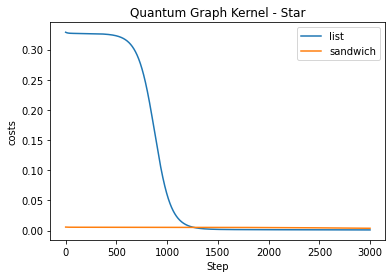

In [240]:
t = np.arange(3000)
plt.figure()

plt.plot(list_cost[1:3000], label='list')
plt.plot(sandwich_cost[1:3000], label='sandwich')
plt.legend(loc = 'upper right')
plt.title('Quantum Graph Kernel - ' + graph_type)
ax = plt.gca()
#ax.set_ylim([0.0, 1])

plt.xlabel("Step")
plt.ylabel("costs")

#plt.savefig('Graphics_Training/QGK_Random.svg', format='svg', dpi = 1200)